**COURSE: PRDL/MLLB**

**PROJECT: Deep Learning**

**TEACHER: Luis Hernández Gómez**

**AUTHORS: MARONE Mamadou / RACHIDI Inass**

**NOTEBOOK: PRE-PROCESSING**

# SETUP

In [3]:
%%capture
!pip install tensorflow
!pip install tqdm
!pip install missingno

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import os
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import nltk

In [5]:
os.chdir(r"C:\Users\maron\OneDrive\02-Documents\00.ETUDES\00.ECOLE_D_INGE\00.CYCLE_ING_FORMATION_INIT\00.3EME_ANNEE_INIT\00.A_COURS\00.PRDL\06.PROJECTS")

# DATA LOADING

In [6]:
df_corpus = pd.read_csv("DATA\\archive\\news-article-categories.csv")
df_corpus.head(3)

,category,title,body
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,"In October 2017, Carolyn Kramer received a dis..."
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,This week I talked with actor Jeff Hiller abou...
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,The New Yorker is taking on President Donald T...


# DATA PREPROCESSING

## HANDLING MISSING & IRRELEVANT VALUES

### MISSING VALUES

To handle missing values we will start checking their presence. For this purpose we will use a visualization tool called missingo that show with empty space the rows that have missing values.

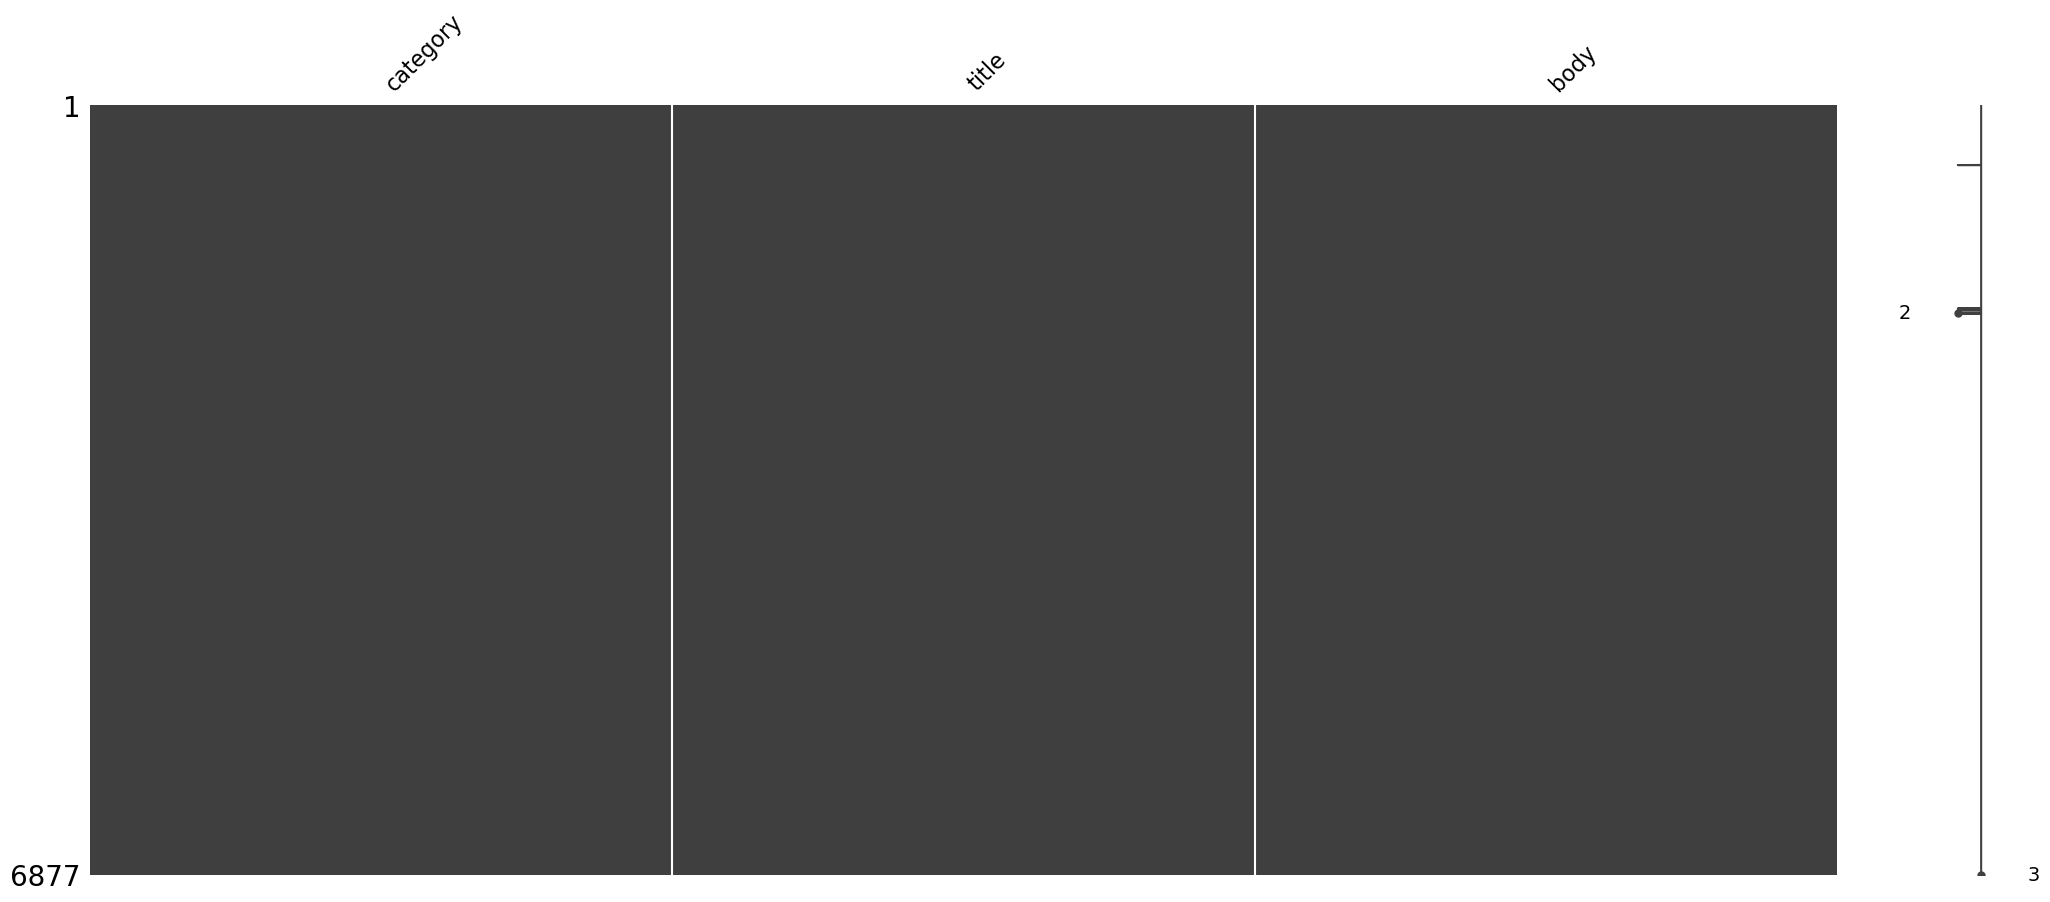

In [7]:
msno.matrix(df_corpus)
plt.show()

## IMBALANCE CHECKING

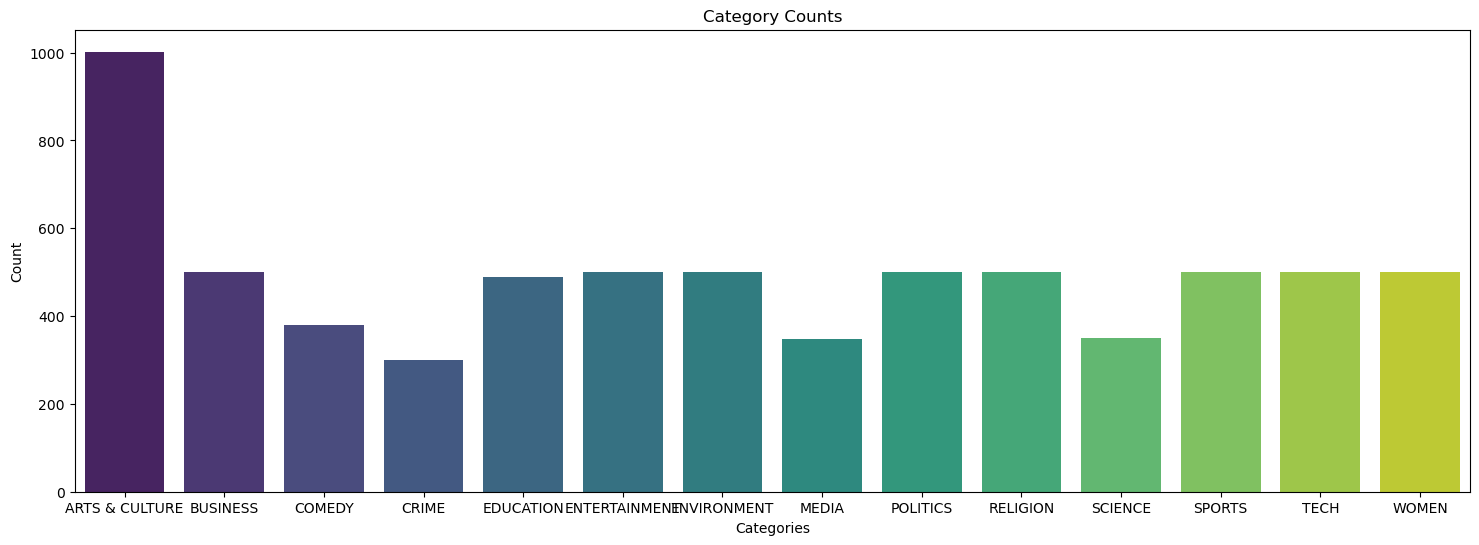

In [18]:
# Create a bar plot using seaborn
plt.figure(figsize=(18, 6))
sns.countplot(x = 'category', data = df_corpus, palette = 'viridis')
plt.title('Category Counts')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

The category art is over represented in our dataset creating imbalance. That is why we will remove some rows form the datset.

In [28]:
# Specify the category to remove rows from
overrepresented_category = 'ARTS & CULTURE'

# Specify the number of rows to remove
rows_to_remove = 400

# Get the indices of rows with the specified category
rows_to_remove_indices = df_corpus[df_corpus['category'] == overrepresented_category].sample(rows_to_remove).index

# Drop the rows from the DataFrame
df_corpus = df_corpus.drop(rows_to_remove_indices)

# TEXT PREPROCESSING

To pre-process the texts we will create a function that can do all the step at once and the we apply this function to the coulmns in question ('title' and 'body') of our datafram.

It is worth to precise that all the parts of the text pre-processing are not performed here. Just the cleaning, the stemming, and the stopwords removal are done here. The remaining part are performed everytime before building the model building a model.

In [29]:
# Download NLTK stopwords
nltk.download('stopwords')

# Initialize the Porter Stemmer
ps = PorterStemmer()

# function for text preprocessing
def preprocess_text(text):
    try:
        text = re.sub('[^a-zA-Z]', ' ', text)                                   # This line remove from the text all the irrelevant symboles that does not bring information for the comprehension of the text
        text = text.lower()                                                     # make all the letters in the text lowercase
        text = text.split()                                                     # create a list of all the words in text and apply stemming and stopwords removal on them in the next line
        text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
        text = ' '.join(text)                                                   # Then recreate the text from the results
        text = text.lstrip(" ").rstrip(" ")                                     # this line is to avoid having space at the beginning or at the end of the text
        return text
    except Exception as e:
        print(f"Error in preprocess_text: {e}")
        print(f"Text causing the error: {text}")
        return ""                                                               # An empty text is returned when one of this steps are not respected. 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Then we create a new dataframe to store the cleaned and preprocessed text. The preprocessing is applied to the titles and to the bodies separately

In [30]:
df_corpus_cleaned = pd.DataFrame()
df_corpus_cleaned['category'] = df_corpus['category']

In [31]:
df_corpus_cleaned['title'] = df_corpus['title'].apply(preprocess_text)

In [33]:
df_corpus_cleaned['body'] = df_corpus['body'].apply(lambda x: preprocess_text(str(x)))

In the next celle we decided to create a new columns by concatenating the title and the body of the news article.

In [34]:
# Combine 'title' and 'body' columns if needed
df_corpus_cleaned['text'] = df_corpus_cleaned['title'] + ' ' + df_corpus_cleaned['body']

# Display the cleaned DataFrame
df_corpus_cleaned.head()

,category,title,body,text
3,ARTS & CULTURE,man surpris girlfriend draw differ anim style,kellen hickey year old live hudson wisconsin g...,man surpris girlfriend draw differ anim style ...
4,ARTS & CULTURE,artist give renaiss style sculptur goofi moder...,someth combin tradit uptight look renaiss peri...,artist give renaiss style sculptur goofi moder...
5,ARTS & CULTURE,dutch year old epitom futur american filmmak,joosj duk sweater read panic wear day might we...,dutch year old epitom futur american filmmak j...
6,ARTS & CULTURE,broadway actor ben vereen accus sexual assault...,multipl women accus broadway star ben vereen s...,broadway actor ben vereen accus sexual assault...
8,ARTS & CULTURE,met museum chang pay wish admiss polici,non new yorker offici less two month take adva...,met museum chang pay wish admiss polici non ne...


Finally, the result will be stored in a csv file so it can be loaded into the other noteboks to train the different models

# RECHECKING AFTER CLEANING AND TEXT PREPROCESSING

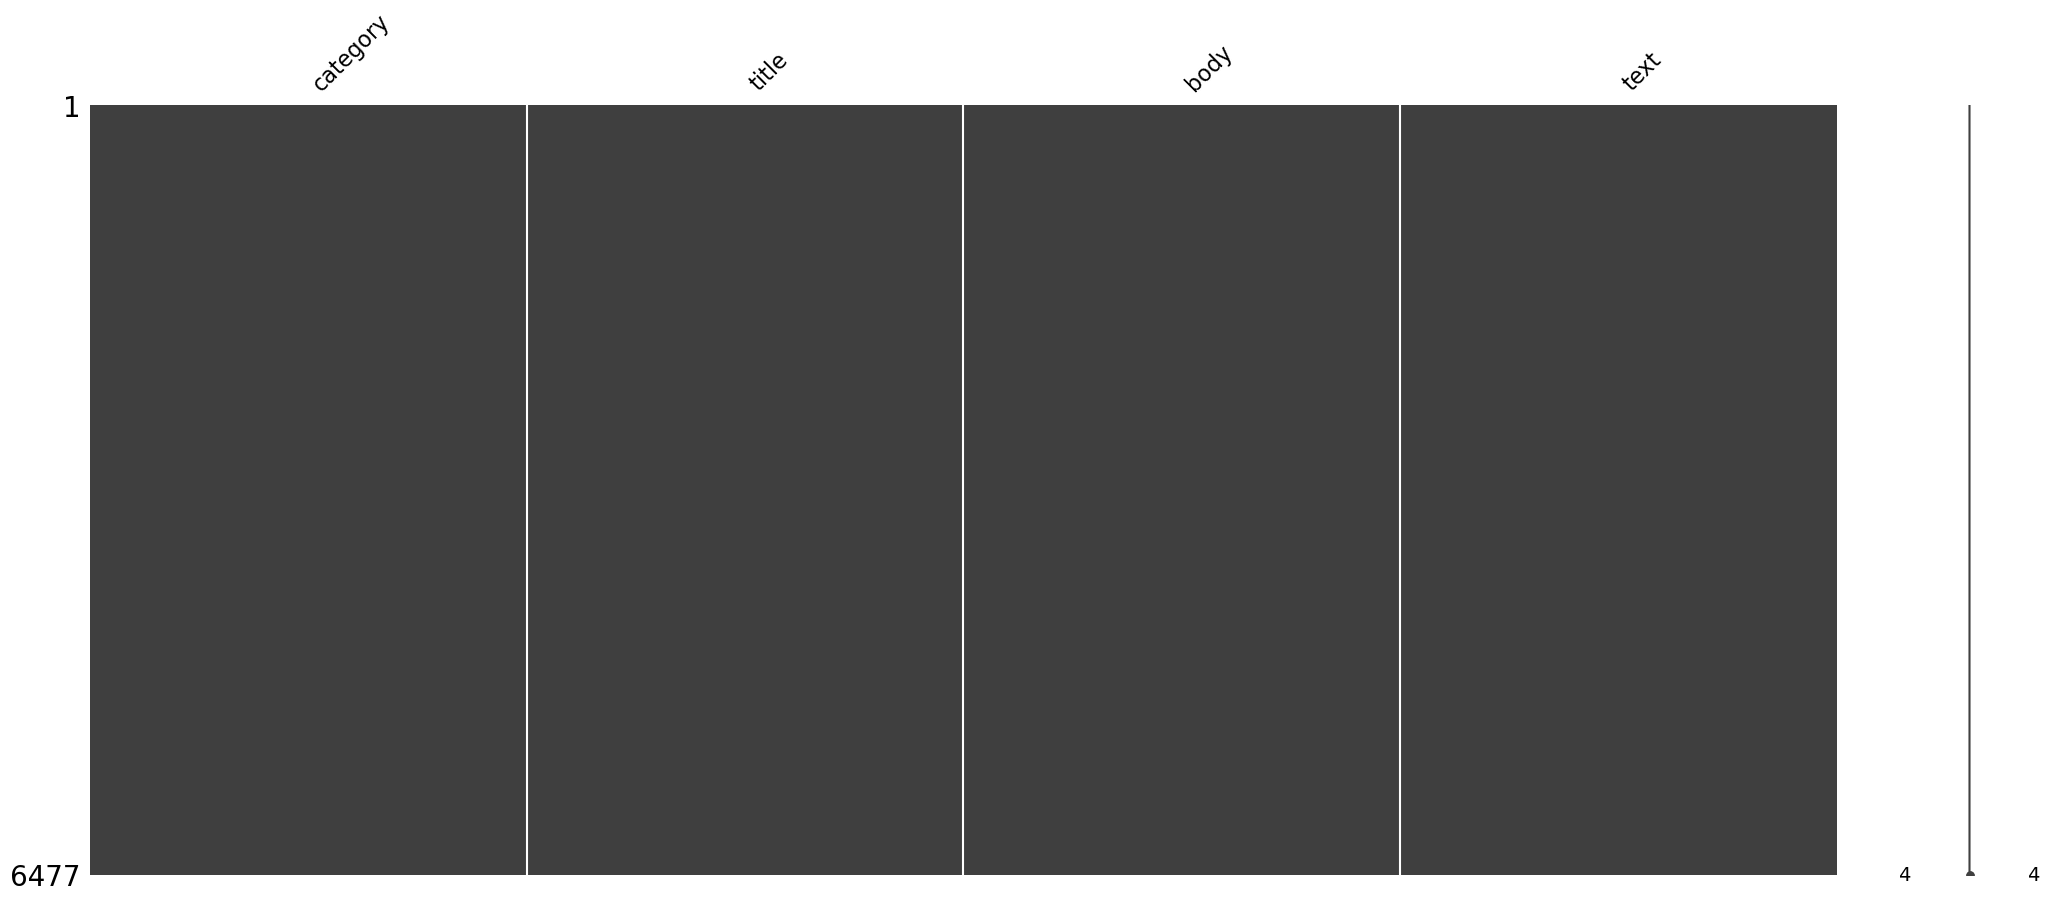

In [35]:
msno.matrix(df_corpus_cleaned)
plt.show()

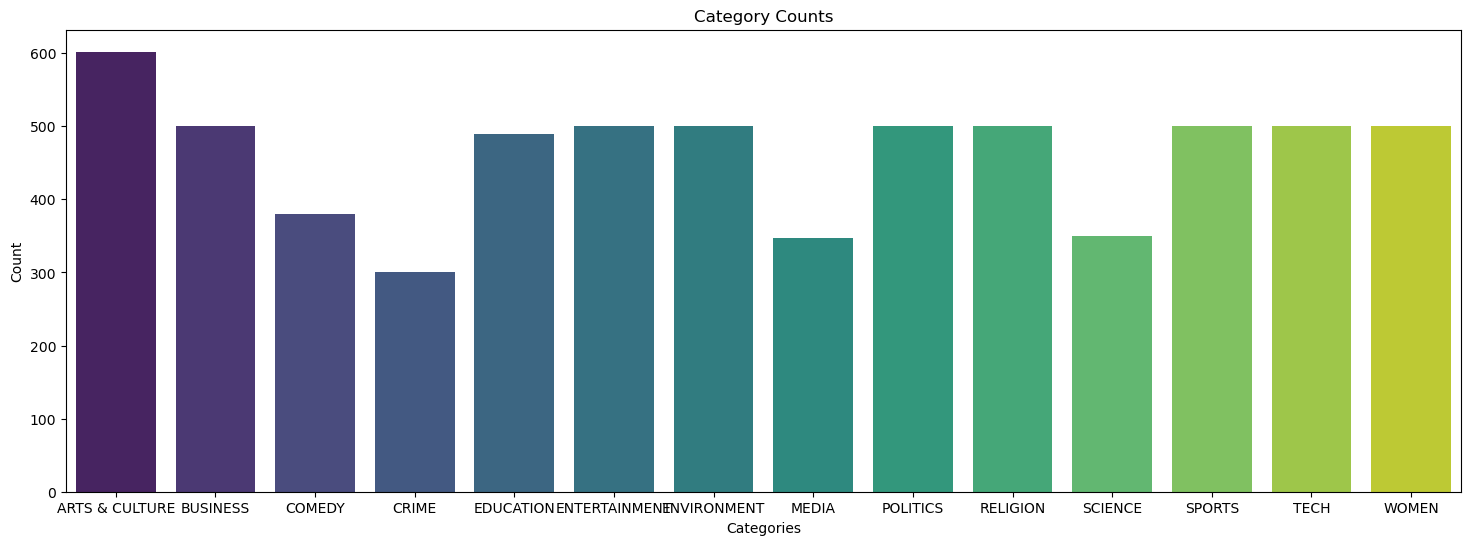

In [36]:
# Create a bar plot using seaborn
plt.figure(figsize=(18, 6))
sns.countplot(x = 'category', data = df_corpus_cleaned, palette = 'viridis')
plt.title('Category Counts')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

# STORING THE RESULT

In [37]:
# Save the DataFrame to a CSV file
df_corpus_cleaned.to_csv("DATA\PREPROCESSED\corpus_cleaned.csv", index = False)